In [185]:
# Importing libraries
import tensorflow as tf
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import matplotlib.pyplot as plt 

%config InlineBackend.figure_format = 'svg'

In [279]:

learning_rate = 0.01
epochs = 100000
display_step = 1000
n_samples=1000

In [287]:
# Loading Data
train_X_1 = np.random.uniform(1.0, 10.5, size=(1, n_samples))
train_X_2 = np.random.uniform(1.0, 10.5, size=(1, n_samples))
train_Y = train_X_1 + train_X_2 

# print(train_X_1)
# print('+++++++', '\n')
# print(train_X_2)
# print('+++++++', '\n')

# print(train_Y)

<IPython.core.display.Javascript object>


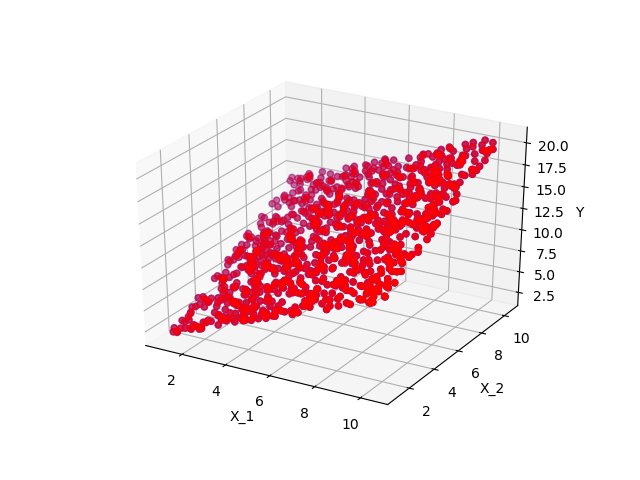

In [288]:
# Visualizing Data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_X_1,train_X_2,train_Y, c='b')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y' )
ax.scatter(train_X_1,train_X_2,train_X_1+train_X_2,c='r')
plt.show()

In [228]:
# Declaring Placeholders and Variables
X_1 = tf.placeholder(tf.float32)
X_2 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W_1 = tf.Variable(np.random.randn(), name="weight_1")
W_2 = tf.Variable(np.random.randn(), name="weight_2")
B = tf.Variable(np.random.randn(), name="bias")

In [283]:
# Setting up logistic Regression in 2 variables
pred = W_1*X_1 + W_2*X_2 + B

# Declaring the cost function
cost = tf.reduce_sum((pred - Y)**2)/(2*n_samples)

# Using gradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [284]:
init = tf.global_variables_initializer()

In [286]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(epochs):
        for (x_1, x_2, y) in zip(train_X_1, train_X_2, train_Y):
            sess.run(optimizer, feed_dict={X_1: x_1, X_2: x_2, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X_1: x_1, X_2: x_2, Y: y})
            print ('Epoch:', '%04d' % (epoch+1), 'cost=', "{:.15f}".format(c), 'W_1=', sess.run(W_1),'W_2=', sess.run(W_2), 'b=', sess.run(B))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X_1: x_1, X_2: x_2, Y: y})
    print ("Training cost=", training_cost, "W_1=", sess.run(W_1),"W_2=", sess.run(W_2), "b=", sess.run(B), '\n')

Epoch: 1000 cost= 0.003548753913492 W_1= 1.0202528 W_2= 1.0201408 b= -0.25859776
Epoch: 2000 cost= 0.000435348978499 W_1= 1.0070934 W_2= 1.0070546 b= -0.09057438
Epoch: 3000 cost= 0.000053405998187 W_1= 1.0024846 W_2= 1.0024707 b= -0.031724185
Epoch: 4000 cost= 0.000006551716069 W_1= 1.0008702 W_2= 1.0008653 b= -0.011111499
Epoch: 5000 cost= 0.000000803986438 W_1= 1.0003048 W_2= 1.0003031 b= -0.0038918152
Epoch: 6000 cost= 0.000000098625137 W_1= 1.0001068 W_2= 1.0001062 b= -0.0013634012
Epoch: 7000 cost= 0.000000012140138 W_1= 1.0000374 W_2= 1.0000372 b= -0.00047757558
Epoch: 8000 cost= 0.000000001503458 W_1= 1.0000132 W_2= 1.0000131 b= -0.0001681487
Epoch: 9000 cost= 0.000000000194903 W_1= 1.0000048 W_2= 1.0000048 b= -6.072116e-05
Epoch: 10000 cost= 0.000000000027927 W_1= 1.0000018 W_2= 1.0000018 b= -2.2786713e-05
Epoch: 11000 cost= 0.000000000006088 W_1= 1.0000008 W_2= 1.0000008 b= -1.0019069e-05
Epoch: 12000 cost= 0.000000000002479 W_1= 1.0000006 W_2= 1.0000006 b= -6.8709687e-06
Epo

Epoch: 99000 cost= 0.000000000001431 W_1= 1.0000004 W_2= 1.0000004 b= -4.2906986e-06
Epoch: 100000 cost= 0.000000000001474 W_1= 1.0000004 W_2= 1.0000004 b= -4.2930624e-06
Optimization Finished!
Training cost= 1.4736089e-12 W_1= 1.0000004 W_2= 1.0000004 b= -4.2930624e-06 

